attenzione, gvector e angoli torsionali hanno una metrica diversa, dovrei scegliere un fattore con cui pesarli uno rispetto all'altro... posso dividerli per la media?)

In [1]:
import scipy.sparse
import pyemma

In [2]:
traj0 = "../../Adenosine_helix/Adenosine_Metad/dump.xtc"
traj1 = "PureMD_ensemble/1000pdbs/dump.xtc"
traj2 = "Davies_ME_ensemble/dump.xtc"
traj3 = "Davies_rG2_nw/dump.xtc"
top = "../TIP3_8rep/prova.pdb"

In [3]:
from importlib.machinery import SourceFileLoader
bb = SourceFileLoader("barnbaba","/net/sbp/sbpstore1/vpiompon/barnaba/barnaba/__init__.py").load_module()
import numpy as np

In [4]:
resA=['A_9_0','A_10_0','U_11_0','A_12_0','U_29_1','A_30_1','U_31_1','U_32_1']
resI=['I_9_0','I_10_0','U_11_0','I_12_0','U_29_0','I_30_0','U_31_0','U_32_0']
resi=[resA, resI, resI, resI]
data=[]

tops = ["../../Adenosines_helix/Adenosine_Metad/rna.pdb","../TIP3_8rep/prova.pdb","../TIP3_8rep/prova.pdb","../TIP3_8rep/prova.pdb"]
trajs=["../../Adenosines_helix/Adenosine_Metad/1000pdbs/dump.xtc","PureMD_ensemble/dump.xtc","Davies_ME_ensemble/dump.xtc","Davies_rG2_nw/dump.xtc"]
ind=[8,9,10,11,28,29,30,31]

for i in range(4):
    
    angles_s,res_s = bb.backbone_angles(trajs[i],topology=tops[i], residues=resi[i])
    angles_s=np.reshape(angles_s, (len(angles_s), -1))

    angles_s_cos = np.cos(angles_s)
    angles_s_sin = np.sin(angles_s) 
    
    angles_su,rr = bb.sugar_angles(trajs[i],topology=tops[i], residues=resi[i])
    angles_su=np.reshape(angles_su, (len(angles_su), -1))
    
    angles_su_cos=np.cos(angles_su)
    angles_su_sin=np.sin(angles_su)
    
    del angles_s
    del angles_su
    
    gvec,seq = bb.dump_gvec(trajs[i],topology=tops[i])
    Gvecs=gvec[:,:,ind,:]
    Gvecs=Gvecs[:,ind,:,:]
    del gvec
    Gvecs=np.reshape(Gvecs, (len(Gvecs), -1))
    data.append(np.concatenate((Gvecs,angles_s_cos, angles_s_sin, angles_su_cos, angles_su_sin), axis=1))

# Loading ../../Adenosines_helix/Adenosine_Metad/1000pdbs/dump.xtc 
# Loading ../../Adenosines_helix/Adenosine_Metad/1000pdbs/dump.xtc 
# Loading ../../Adenosines_helix/Adenosine_Metad/1000pdbs/dump.xtc 
# Loading PureMD_ensemble/dump.xtc 
# Treating nucleotide I9 as G 
# Treating nucleotide I10 as G 
# Treating nucleotide I12 as G 
# Treating nucleotide I30 as G 
# Loading PureMD_ensemble/dump.xtc 
# Treating nucleotide I9 as G 
# Treating nucleotide I10 as G 
# Treating nucleotide I12 as G 
# Treating nucleotide I30 as G 
# Loading PureMD_ensemble/dump.xtc 
# Treating nucleotide I9 as G 
# Treating nucleotide I10 as G 
# Treating nucleotide I12 as G 
# Treating nucleotide I30 as G 
# Loading Davies_ME_ensemble/dump.xtc 
# Treating nucleotide I9 as G 
# Treating nucleotide I10 as G 
# Treating nucleotide I12 as G 
# Treating nucleotide I30 as G 
# Loading Davies_ME_ensemble/dump.xtc 
# Treating nucleotide I9 as G 
# Treating nucleotide I10 as G 
# Treating nucleotide I12 as G 
# Treat

In [5]:
np.shape(Gvecs)

(1000, 256)

In [6]:
np.mean(Gvecs)

0.0956612642340762

In [7]:
np.shape(angles_s_cos)

(1000, 56)

In [8]:
np.shape(angles_su_cos)

(1000, 40)

In [9]:
np.shape(data)
conc_data=np.array(data).reshape(-1,448)
np.shape(conc_data)

(4000, 448)

In [10]:
comp=pyemma.coordinates.pca(conc_data, dim=2)
comp=comp.get_output()

In [11]:
len(comp[0])

4000

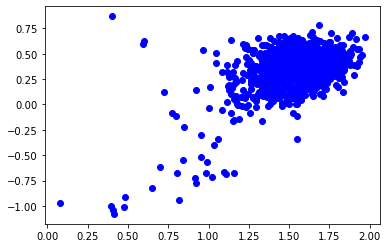

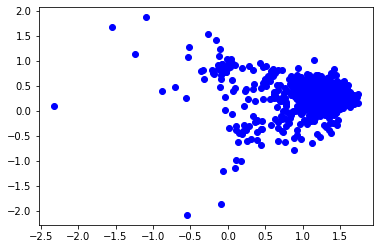

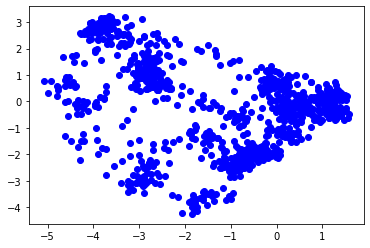

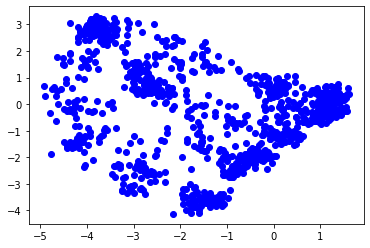

In [14]:
import matplotlib.pyplot as plt
le=int(len(comp[0])/4)
for i in range(4):
    plt.scatter(comp[0][le*i:le*(i+1),0], comp[0][le*i:le*(i+1),1], label='I (ME_JC)', color='b')
    plt.show()

In [15]:
from scipy.stats import gaussian_kde
import scipy.stats as st


i=0

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, 'Adenosine Ensemble')

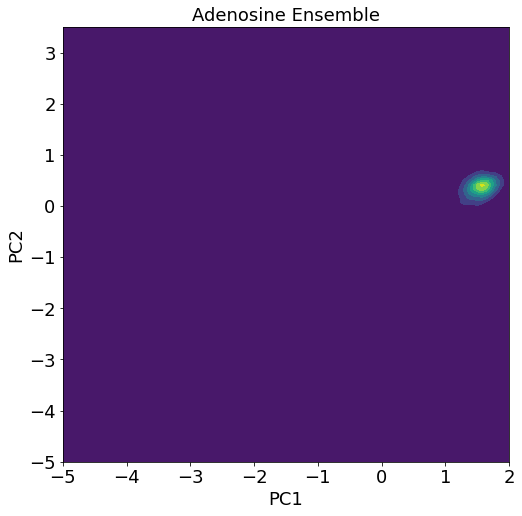

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Adenosine Ensemble', fontsize=18)

Text(0.5, 1.0, 'Inosine Ensemble')

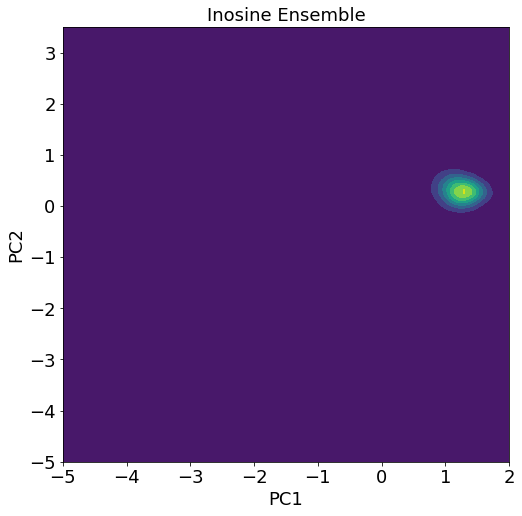

In [17]:
i=1

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Inosine Ensemble', fontsize=18)

Text(0.5, 1.0, 'Inosine (ME_JC) Ensemble')

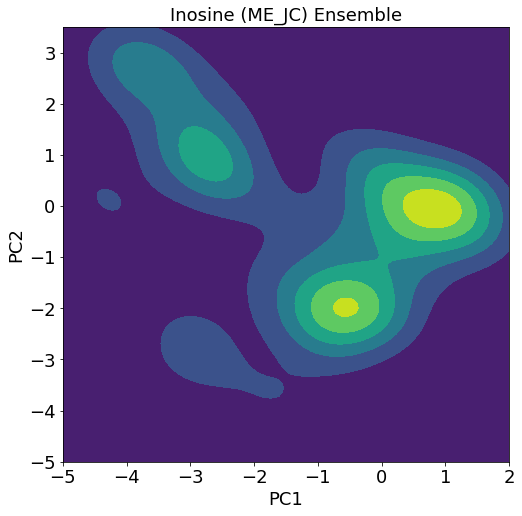

In [18]:
i=2

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Inosine (ME_JC) Ensemble', fontsize=18)

Text(0.5, 1.0, 'Inosine (ME_JC&rG) Ensemble')

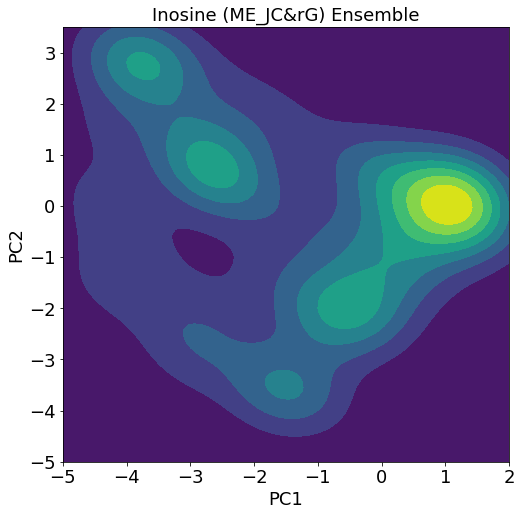

In [19]:
i=3

ben=np.array(comp[0][le*i:le*(i+1),0])
twi=np.array(comp[0][le*i:le*(i+1),1])


# Extract x and y
x = ben
y = twi
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2
ymin=-5
ymax=3.5
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f)
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Inosine (ME_JC&rG) Ensemble', fontsize=18)

In [149]:
state0=[]
for k in range(4):
    app=[]
    for j in range(1000):
        i=k*1000+j
        if  comp[0][i,0] > 0 and comp[0][i,0] < 1.5 and comp[0][i,1] < 0.5 and comp[0][i,1]>-0.5:
            app.append(j)
    state0.append(app)

In [152]:
indexes=np.array(state0[3])+1
indexes.tolist()

[1,
 2,
 3,
 4,
 5,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 75,
 76,
 77,
 79,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 90,
 95,
 100,
 101,
 102,
 230,
 231,
 232,
 247,
 248,
 249,
 250,
 252,
 253,
 310,
 311,
 312,
 313,
 314,
 351,
 352,
 354,
 359,
 397,
 401,
 751,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 764,
 765,
 766,
 767,
 768,
 770,
 771,
 773,
 774,
 776,
 777,
 779,
 781,
 783,
 785,
 786,
 787,
 789,
 790,
 792,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 804,
 805,
 806,
 807,
 808,
 810,
 811,
 812,
 813,
 814,
 815,
 816,
 817,
 818,
 819,
 820,
 821,
 822,
 823,
 824,
 825,
 826,
 827,
 828,
 829,
 831,
 836,
 843,
 852,
 871,
 872,
 873,
 874,
 875,
 908,
 909,
 910,
 912,
 913,
 914,
 915,
 916,
 917,
 918,
 920,
 921,
 922,
 923,
 972,
 973,
 974,
 975,
 977,
 978,
 993,
 994,
 995,

In [153]:
state1=[]
for k in range(4):
    app=[]
    for j in range(1000):
        i=k*1000+j
        if comp[0][i,0] <0 and comp[0][i,0] > -1.2  and comp[0][i,1] < -1.3 and comp[0][i,1]>-2.5:
            app.append(j)
    state1.append(app)
    

In [154]:
len(state1[3])

96

In [155]:
indexes=np.array(state1[3])+1
indexes.tolist()

[255,
 256,
 261,
 268,
 272,
 273,
 276,
 281,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 298,
 299,
 302,
 303,
 306,
 307,
 317,
 318,
 319,
 320,
 322,
 323,
 324,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 338,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 349,
 360,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 376,
 377,
 378,
 379,
 381,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 391,
 853,
 864,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 970]

In [124]:
indexes=np.array(state2[3])+1
indexes.tolist()

[103,
 104,
 105,
 106,
 107,
 109,
 112,
 113,
 114,
 115,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 211,
 212,
 213,
 214,
 215,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 405,
 407,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458

In [81]:
state1

[1263,
 1269,
 1281,
 2304,
 2305,
 2313,
 2314,
 2315,
 2319,
 2320,
 2321,
 2322,
 2323,
 2324,
 2325,
 2326,
 2327,
 2328,
 2329,
 2330,
 2331,
 2332,
 2333,
 2334,
 2335,
 2336,
 2337,
 2338,
 2339,
 2340,
 2341,
 2342,
 2343,
 2344,
 2345,
 2346,
 2347,
 2348,
 2349,
 2350,
 2351,
 2352,
 2353,
 2354,
 2355,
 2356,
 2357,
 2358,
 2359,
 2360,
 2361,
 2362,
 2363,
 2364,
 2371,
 2384,
 2385,
 2386,
 2387,
 2388,
 2389,
 2390,
 2391,
 2392,
 2393,
 2394,
 2395,
 2396,
 2397,
 2398,
 2399,
 2400,
 2401,
 2402,
 2403,
 2404,
 2405,
 2406,
 2407,
 2408,
 2409,
 2410,
 2411,
 2412,
 2413,
 2414,
 2415,
 2416,
 2417,
 2418,
 2419,
 2420,
 2421,
 2422,
 2423,
 2424,
 2425,
 2426,
 2427,
 2428,
 2429,
 2430,
 2431,
 2432,
 2433,
 2434,
 2435,
 2436,
 2437,
 2438,
 2439,
 2440,
 2441,
 2442,
 2443,
 2444,
 2445,
 2446,
 2447,
 2448,
 2449,
 2450,
 2451,
 2452,
 2453,
 2454,
 2455,
 2456,
 2457,
 2458,
 2459,
 2460,
 2462,
 2465,
 2479,
 2480,
 2482,
 2483,
 2486,
 2487,
 2489,
 2490,
 2491,

In [159]:
state2a=[]
for k in range(4):
    app=[]
    for j in range(1000):
        i=k*1000+j
        if  comp[0][i,0] <-2 and comp[0][i,0] >-3  and comp[0][i,1]>0  and comp[0][i,1]<1:
            app.append(j)
    state2a.append(app)

In [160]:
len(state2a[3])

75

In [161]:
indexes=np.array(state2a[3])+1
indexes.tolist()

[103,
 104,
 105,
 106,
 107,
 112,
 113,
 114,
 115,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 166,
 168,
 171,
 174,
 181,
 187,
 405,
 409,
 410,
 411,
 412,
 413,
 415,
 416,
 417,
 418,
 419,
 420,
 544,
 551,
 552,
 935]

In [138]:
state2b=[]
for k in range(4):
    app=[]
    for j in range(1000):
        i=k*1000+j
        if  comp[0][i,0] <-3 and comp[0][i,0] >-4  and comp[0][i,1]>2  and comp[0][i,1]<3:
            app.append(j)
    state2b.append(app)

In [139]:
indexes=np.array(state2b[3])+1
indexes.tolist()

[421,
 422,
 423,
 424,
 426,
 427,
 428,
 430,
 431,
 433,
 434,
 436,
 438,
 439,
 440,
 443,
 446,
 447,
 448,
 449,
 452,
 453,
 454,
 455,
 456,
 459,
 460,
 461,
 463,
 468,
 469,
 470,
 474,
 475,
 479,
 481,
 482,
 484,
 485,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 500,
 501,
 502,
 504,
 508,
 509,
 510,
 511,
 512,
 516,
 517,
 518,
 520,
 521,
 522,
 529]

In [144]:
state3=[]
for k in range(4):
    app=[]
    for j in range(1000):
        i=k*1000+j
        if  comp[0][i,0] <-1  and comp[0][i,0] >-2  and comp[0][i,1]<-3  and comp[0][i,1]>-4:
            app.append(j)
    state3.append(app)

In [145]:
indexes=np.array(state3[3])+1
indexes.tolist()

[675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 738,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 925]

In [140]:
stateNo=[]
for k in range(4):
    app=[]
    for j in range(1000):
        i=k*1000+j
        if  comp[0][i,0] <-3  and comp[0][i,1]>-2  and comp[0][i,1]<0:
            app.append(j)
    stateNo.append(app)

In [141]:
indexes=np.array(stateNo[3])+1
indexes.tolist()

[211,
 213,
 214,
 216,
 217,
 563,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 595,
 596,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 654,
 655,
 656,
 657,
 658,
 659,
 661,
 662,
 663,
 664,
 665,
 667,
 669,
 670,
 671]

In [129]:
np.save('PCA_array',comp[0])

In [151]:
np.save('state0_index',state0[3])
np.save('state1_index',state1[3])
np.save('state2a_index',state2a[3])
np.save('state2b_index',state2b[3])
np.save('state3_index',state3[3])

In [14]:
import numpy as np
B1=np.load('state0_index.npy')
B2=np.load('state1_index.npy')
B3=np.load('state2a_index.npy')
B4=np.load('state2b_index.npy')
B5=np.load('state3_index.npy')

In [2]:
import numpy as np
bends_d=[]
twists_d=[]
incl_d=[]
for j in range(1000):
    filename = "Davies_rG2_nw/1000pdbs/Curves/curves"+str(j)+".lis"  # Replace with the name of your file

    # Open the file for reading
    with open(filename, 'r') as f:

        # Read all lines into a list
        lines = f.readlines()


        row_bend = lines[51].strip().split()
        row_twist = lines[102].strip().split()
        bends_d.append(float(row_bend[8]))
        incl_d.append(float(row_bend[3]))
        twists_d.append(float(row_twist[6]))
        
bend=np.array(bends_d)
twist=np.array(twists_d)

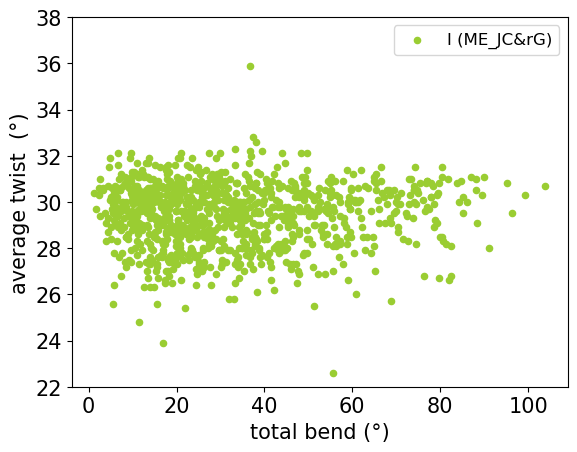

In [30]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I (ME_JC&rG)', color='yellowgreen')


plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()

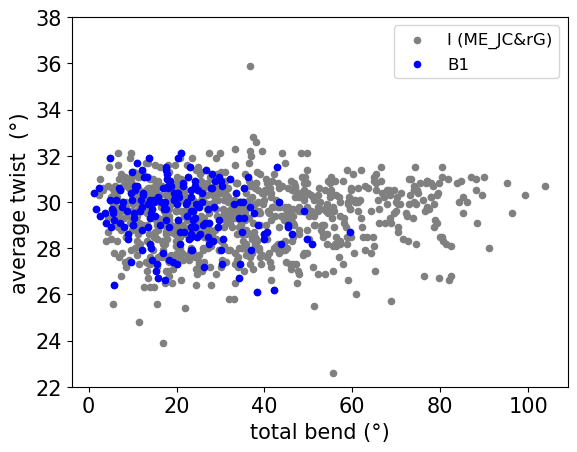

In [31]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I (ME_JC&rG)', color='grey')
plt.scatter(bend[B1], twist[B1], s=siz, label='B1', color='blue')




plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()

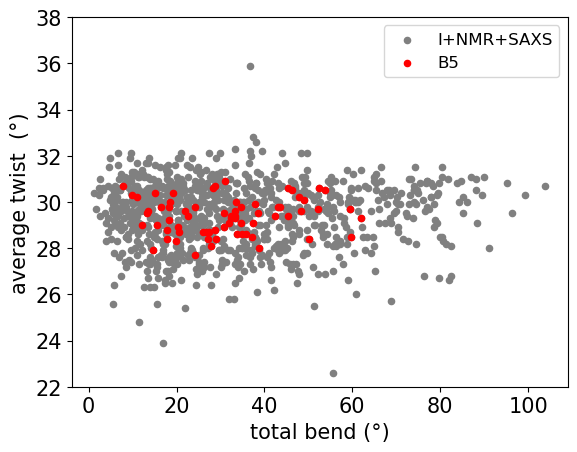

In [40]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I+NMR+SAXS', color='grey')
#plt.scatter(bend[B1], twist[B1], s=siz, label='B1', color='orange')
#plt.scatter(bend[B2], twist[B2], s=siz, label='B2', color='blue')
#plt.scatter(bend[B3], twist[B3], s=siz, label='B3', color='yellow')
#plt.scatter(bend[B4], twist[B4], s=siz, label='B4', color='green')
plt.scatter(bend[B5], twist[B5], s=siz, label='B5', color='red')




plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()

Clustering

In [3]:
import numpy as np
PC1=np.load('PC1.npy')
PC2=np.load('PC2.npy')

In [4]:
Matrix=np.zeros((1000,1000))

for i in range(1000):
    for j in range(1000):
        Matrix[i][j]=np.sqrt((PC1[3000+i]-PC1[3000+j])**2+(PC2[3000+i]-PC2[3000+j])**2)

In [5]:
from importlib.machinery import SourceFileLoader
bl = SourceFileLoader("bussilab","/net/sbp/sbpstore1/vpiompon/py-bussilab/bussilab/__init__.py").load_module()
bl

cluster=bl.clustering.qt(Matrix, cutoff=1.2, weights=None, max_clusters=5)

In [6]:
cluster

 clusters: [array([800,  81,  66,  68,  61, 775, 797,  63, 813, 818,  37, 101, 100,
                   76,  67, 822,  62, 799, 817,  59,  80,  74,  56, 816, 798,  85,
                  796, 810,  58, 772, 823, 812,  46, 805, 820,  57, 815,  78,  42,
                   41, 806, 827, 807, 795, 804, 801,  83,  47, 809, 802, 821, 788,
                  871,  99, 763, 870, 761, 785, 915, 814, 230,  15,  86,  52, 824,
                  909,  64, 811, 778, 808,  82,  43,  40,  39,  51,  36, 769, 760,
                  819, 247, 920,   2, 753, 246, 803,  45, 917, 777,  14, 774, 757,
                  828, 972, 755, 786,  53, 908, 789, 974,   7, 916,   8, 872,   0,
                  765, 998,  10, 835, 907, 874, 994,   1, 914, 751, 921,   3, 249,
                  912, 784, 767, 911, 229, 231, 873, 992,   6, 973, 766,  44, 999,
                   49, 313, 791, 919, 922, 782, 248, 993, 995, 780,   4,  12,  13,
                  971, 759, 830,  54, 245, 976, 764, 776, 754, 252, 826, 758, 913,
   

In [5]:
cluster

 clusters: [array([800,  81,  66,  68,  61, 775, 797,  63, 813, 818,  37, 101, 100,
                   76,  67, 822,  62, 799, 817,  59,  80,  74,  56, 816, 798,  85,
                  796, 810,  58, 772, 823, 812,  46, 805, 820,  57, 815,  78,  42,
                   41, 806, 827, 807, 795, 804, 801,  83,  47, 809, 802, 821, 788,
                  871,  99, 763, 870, 761, 785, 915, 814, 230,  15,  86,  52, 824,
                  909,  64, 811, 778, 808,  82,  43,  40,  39,  51,  36, 769, 760,
                  819, 247, 920,   2, 753, 246, 803,  45, 917, 777,  14, 774, 757,
                  828, 972, 755, 786,  53, 908, 789, 974,   7, 916,   8, 872,   0,
                  765, 998,  10, 835, 907, 874, 994,   1, 914, 751, 921,   3, 249,
                  912, 784, 767, 911, 229, 231, 873, 992,   6, 973, 766,  44, 999,
                   49, 313, 791, 919, 922, 782, 248, 993, 995, 780,   4,  12,  13,
                  971, 759, 830,  54, 245, 976, 764, 776, 754, 252, 826, 758, 913,
   

In [13]:
rest=[]
for i in range(1000):
    app=0
    for k in range(5):
        for j in range(len(cluster.clusters[k])):
            if cluster.clusters[k][j]==i:
                app=1
    if app<1:
        rest.append(i)
rest=np.array(rest)        

In [14]:
len(rest)

465

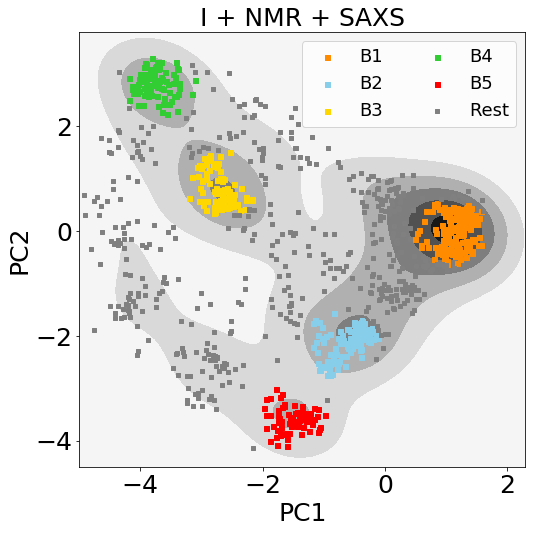

In [56]:
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
import scipy.stats as st


ben=PC1[3000:]
twi=PC2[3000:]


# Extract x and y
x = ben
y = twi
#zdata=countC2
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2.3
ymin=-4.5
ymax=3.8
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f, cmap='Greys')
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])
pnt3d=ax.scatter(x[cluster.clusters[0]], y[cluster.clusters[0]],marker='s', s=25, color='darkorange', label='B1')
pnt3d=ax.scatter(x[cluster.clusters[1]], y[cluster.clusters[1]],marker='s', s=25, color='skyblue', label='B2')
pnt3d=ax.scatter(x[cluster.clusters[2]], y[cluster.clusters[2]],marker='s', s=25, color='gold', label='B3')
pnt3d=ax.scatter(x[cluster.clusters[3]], y[cluster.clusters[3]],marker='s', s=25, color='limegreen', label='B4')
pnt3d=ax.scatter(x[cluster.clusters[4]], y[cluster.clusters[4]],marker='s', s=25, color='red', label='B5')
pnt3d=ax.scatter(x[rest], y[rest],marker='s', s=10, color='grey', label='Rest')
#pnt3d=ax.scatter(x[cluster.clusters[5]], y[cluster.clusters[5]],marker='s', s=20)
#pnt3d=ax.scatter(x[cluster.clusters[6]], y[cluster.clusters[6]],marker='s', s=20)
#pnt3d=ax.scatter(x[cluster.clusters[7]], y[cluster.clusters[7]],marker='s', s=20)

ax.set_xlabel('PC1', fontsize=25)
ax.set_ylabel('PC2', fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25)
plt.title('I + NMR + SAXS', fontsize=25)
plt.legend(fontsize=18, ncol=2)
#cbar=plt.colorbar(pnt3d, aspect=20)
#cbar.ax.tick_params(labelsize=22) 
#cbar.set_label(r'nucletodes C2endo populated', fontsize=22)

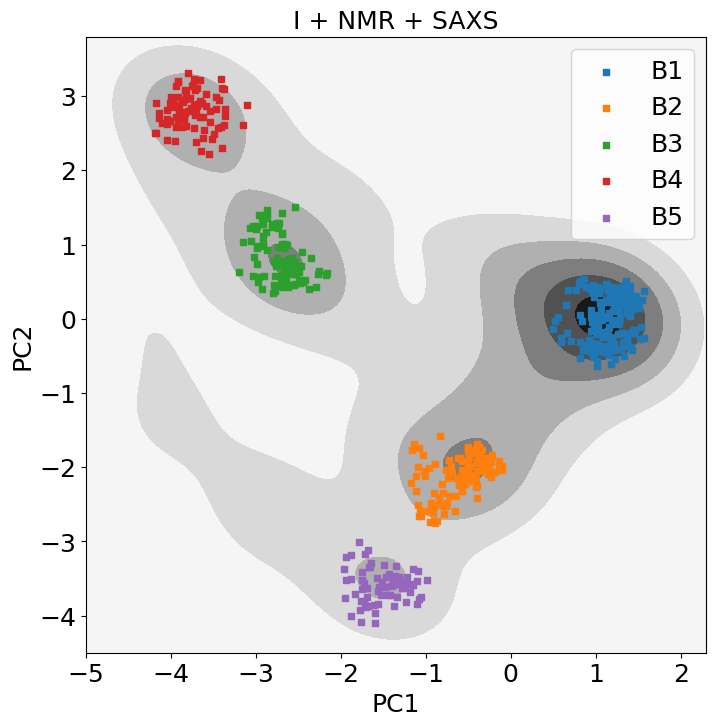

In [85]:
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde
import scipy.stats as st


ben=PC1[3000:]
twi=PC2[3000:]


# Extract x and y
x = ben
y = twi
#zdata=countC2
# Define the borders
#deltaX = (max(x) - min(x))/10
#deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY
#print(xmin, xmax, ymin, ymax)
# Create meshgrid
xmin=-5
xmax=2.3
ymin=-4.5
ymax=3.8
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cfset = ax.contourf(xx, yy, f, cmap='Greys')
#ax.imshow(np.rot90(f), extent=[0, 120, 0, 40])
pnt3d=ax.scatter(x[cluster.clusters[0]], y[cluster.clusters[0]],marker='s', s=20, label='B1')
pnt3d=ax.scatter(x[cluster.clusters[1]], y[cluster.clusters[1]],marker='s', s=20, label='B2')
pnt3d=ax.scatter(x[cluster.clusters[2]], y[cluster.clusters[2]],marker='s', s=20, label='B3')
pnt3d=ax.scatter(x[cluster.clusters[3]], y[cluster.clusters[3]],marker='s', s=20, label='B4')
pnt3d=ax.scatter(x[cluster.clusters[4]], y[cluster.clusters[4]],marker='s', s=20, label='B5')
#pnt3d=ax.scatter(x[cluster.clusters[5]], y[cluster.clusters[5]],marker='s', s=20)
#pnt3d=ax.scatter(x[cluster.clusters[6]], y[cluster.clusters[6]],marker='s', s=20)
#pnt3d=ax.scatter(x[cluster.clusters[7]], y[cluster.clusters[7]],marker='s', s=20)

ax.set_xlabel('PC1', fontsize=18)
ax.set_ylabel('PC2', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('I + NMR + SAXS', fontsize=18)
plt.legend(fontsize=18)
#cbar=plt.colorbar(pnt3d, aspect=20)
#cbar.ax.tick_params(labelsize=22) 
#cbar.set_label(r'nucletodes C2endo populated', fontsize=22)

In [3]:
from importlib.machinery import SourceFileLoader
bb = SourceFileLoader("barnbaba","/net/sbp/sbpstore1/vpiompon/barnaba/barnaba/__init__.py").load_module()
bb

<module 'barnbaba' from '/net/sbp/sbpstore1/vpiompon/barnaba/barnaba/__init__.py'>

In [4]:
top = "../TIP3_8rep/rna_ions.pdb"
list=[]
 

traj = "Davies_rG2_nw/dump.xtc"

couplings,rr = bb.jcouplings(traj,topology=top, residues=['I_9_0','I_10_0','U_11_0','I_12_0','U_23_0','U_29_0','I_30_0','U_31_0','U_32_0'],couplings=['H1H2'])

# Loading Davies_rG2_nw/dump.xtc 
# Treating nucleotide I9 as G 
# Treating nucleotide I10 as G 
# Treating nucleotide I12 as G 
# Treating nucleotide I30 as G 


In [5]:
Exp=[0.84,4.624,5.52,2.71,0.834,1.568,5.752,5.056,5.136]

In [6]:
np.shape(couplings)

(1000, 9, 1)

In [37]:
clus_J=[]
for j in range(5):
    for k in range(9):
        clus_J.append(np.sum(couplings.reshape(-1,9)[cluster.clusters[j],k]/len(cluster.clusters[j])))
clus_J=np.array(clus_J).reshape(-1,9)
clus_J

array([[ 0.34780714,  0.49265035,  1.76931766,  4.78957675,  0.74216536,
         0.63837012,  0.4621396 ,  1.13562416,  1.47235426],
       [ 0.20994467,  0.47890813,  1.20754782,  0.55884606,  0.85595791,
         1.55826012, 10.68549317,  8.77937819,  8.85918456],
       [ 2.07531432, 10.23101369,  9.39590432,  0.20037364,  0.73601061,
         2.08452824,  9.02741488,  2.41315217,  2.54837345],
       [ 0.516492  ,  9.87162575, 10.16396816,  0.24397029,  0.7197436 ,
         0.74326021,  0.97013892,  1.67108896,  9.81826976],
       [ 0.40340903,  0.58742861,  1.62825868,  9.34552591,  0.89698035,
         1.42480769,  9.73119982, 10.73014549,  6.70761383]])

In [61]:
clus_J[1,:]

array([ 0.20994467,  0.47890813,  1.20754782,  0.55884606,  0.85595791,
        1.55826012, 10.68549317,  8.77937819,  8.85918456])

In [7]:
import numpy as np
Jall=[]
for k in range(9):
        Jall.append(np.sum(couplings.reshape(-1,9)[:,k]/1000))

In [11]:
Jall=np.array(Jall)

In [12]:
np.sum((Jall[:]-Exp)**2)/9

0.019246053001088805

In [67]:
Jchi=[]
Jchi.append(0)
for j in range(5):
    Jchi.append(np.sum((clus_J[j,:]-Exp)**2)/9)
Jchi=np.array(Jchi)    

In [69]:
Schi=np.array([3.61, 15.48, 12.72, 1.94, 2.08, 1.51])

In [71]:
Jchi

array([ 0.        , 10.37216405, 10.31878264,  8.77451828, 12.4700772 ,
       14.02053041])

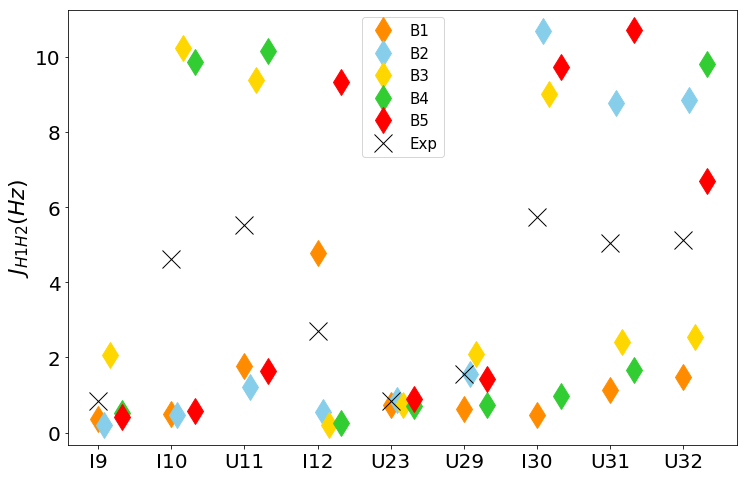

In [55]:
fig = plt.subplots(figsize =(12, 8))
 
res=['I9','I10','U11','I12','U23','U29','I30','U31','U32']
size=18

barWidth = 0.08
br1 = np.arange(len(res))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br4 = [x + barWidth for x in br4]

# Make the plot
plt.plot(br1, clus_J[0], 'd', markersize=size, color='darkorange', label ='B1')
plt.plot(br2, clus_J[1], 'd', markersize=size, color='skyblue', label ='B2')
plt.plot(br3, clus_J[2], 'd', markersize=size, color='gold', label ='B3')
plt.plot(br4, clus_J[3], 'd', markersize=size, color='limegreen', label ='B4')
plt.plot(br4, clus_J[4], 'd', markersize=size, color='red', label ='B5')
plt.plot(res, Exp, 'x', color ='black', markersize=size, label ='Exp')

 
# Adding Xticks
#plt.xlabel('nucleotide', fontweight ='bold', fontsize = 15)
plt.ylabel(r'$J_{H1H2} (Hz)$', fontweight ='bold', fontsize = 22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.yscale('log') 
#plt.ylim(0.0001,1)

plt.legend(loc='upper center', fontsize=15)
plt.show()

In [38]:
import barnaba as bb
from barnaba import definitions
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
trajectory = md.load('Davies_rG2_nw/dump.xtc', top='../TIP3_8rep/prova.pdb')
topology = trajectory.topology

In [44]:
trajectory = md.load('traj_skip100.xtc', top='../TIP3_8rep/prova.pdb')
topology = trajectory.topology

In [45]:
topology.atoms

<generator object Topology.atoms at 0x7f72158b4bd0>

In [46]:
def file_len(fname):
    with open(fname, 'r') as f:
        i=0
        for l in f:
            if "#" not in l:
                i+=1
    return i

def build_pair(name, pair):
    atom=list(atom.index for atom in topology.atoms if str(atom) == name)
    pair.append(int(atom[0]))
    return pair

def list_generator_backbone1(num_pairs):
    atom_pairs=[]
    atom_names=[]
    average=[]
    std=[]
    print(filename)
    with open(filename, 'r') as f:
        index=0
        for line in f:
            pair=[]
            names=[]
            if "#" not in line: 
                nums=line.split()
                base=int(nums[0][0])+1
                for elem in atom_name_list:
                    if elem in nums[0]:
                        if elem == "1H5":
                            elem="1H5'"
                        if elem == "2H5":
                            elem="2H5'"
                        if elem == "H4":
                            elem="H4'"
                        #the first letter here has to match the nucleobase
                        atom="U"+str(base)+"-"+elem
                        #print(atom)
                        pair=build_pair(atom, pair)
                        names.append(atom)
            if len(pair)==2:
                atom_names.append(names)
                atom_pairs.append(pair)
                average.append(float(nums[1]))
                std.append(float(nums[2]))
           
            index+=1   
    
    print(atom_names)
    #print(atom_pairs)
    return    atom_pairs, atom_names, average, std  

In [47]:
filename='../noe_corr.dat'
num_pairs=file_len(filename)
atom_pairs=np.zeros((num_pairs, 2), dtype=int)
atom_names=[]
lower=[]
average=[]
upper=[]
std=[]
with open(filename, 'r') as f:
    index=0
    for line in f:
        pairs=[]
        if "#" not in line: 
            nums=line.split()
            atom_names.append([nums[0],nums[1]])
            atom1=list(atom.index for atom in topology.atoms if str(atom) == nums[0])
            pairs.append(int(atom1[0]))
            atom2=list(atom.index for atom in topology.atoms if str(atom) == nums[1])
            pairs.append(int(atom2[0]))
            atom_pairs[index][:] = pairs   
            
            lower.append(float(nums[2])-float(nums[3]))
            upper.append(float(nums[2])+float(nums[4]))
            average.append(float(nums[2])-float(nums[3])/2+float(nums[4])/2)
            #std.append(np.max(np.array([abs(average[index]-lower[index]),abs(average[index]-upper[index])])))
            std.append(((upper[index]-lower[index])/2))
            
            index+=1

TypeError: 'list' object is not callable

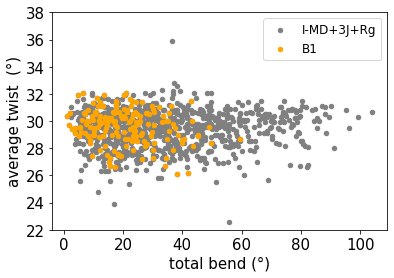

In [9]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I-MD+3J+Rg', color='grey')
plt.scatter(bend[cluster.clusters[0]], twist[cluster.clusters[0]], s=siz, label='B1', color='orange')




plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()

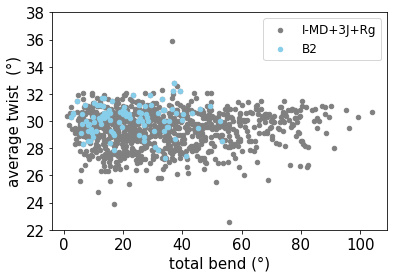

In [10]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I-MD+3J+Rg', color='grey')
plt.scatter(bend[cluster.clusters[1]], twist[cluster.clusters[1]], s=siz, label='B2', color='skyblue')




plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()

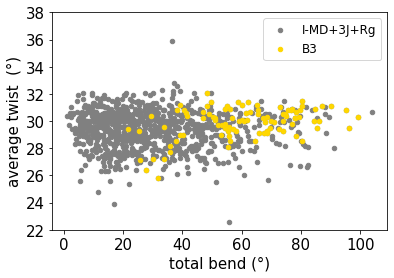

In [11]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I-MD+3J+Rg', color='grey')
plt.scatter(bend[cluster.clusters[2]], twist[cluster.clusters[2]], s=siz, label='B3', color='gold')




plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()

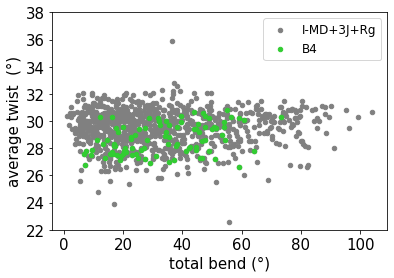

In [12]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I-MD+3J+Rg', color='grey')
plt.scatter(bend[cluster.clusters[3]], twist[cluster.clusters[3]], s=siz, label='B4', color='limegreen')




plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()

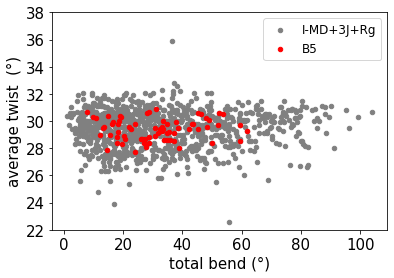

In [13]:
import matplotlib.pyplot as plt
import numpy as np
siz=20

conv=6.28/360

plt.scatter(bend, twist, s=siz, label='I-MD+3J+Rg', color='grey')
plt.scatter(bend[cluster.clusters[4]], twist[cluster.clusters[4]], s=siz, label='B5', color='red')




plt.xlabel('total bend (°)', fontsize=15)
plt.ylabel('average twist  (°)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(fontsize=12)
plt.ylim([22,38])



plt.show()